In [82]:
import base64
import io
import os
from pprint import pprint

from functions import *

In [83]:
TOKEN = 'github_users'
auth_header = {'Content-Type' : 'application/json',
               'Authorization': f'{TOKEN}'}
BASE_URL_PARSER = 'https://tinvois-parser.azurewebsites.net/'
# BASE_URL_PARSER = 'http://localhost:5001/'

# Original image

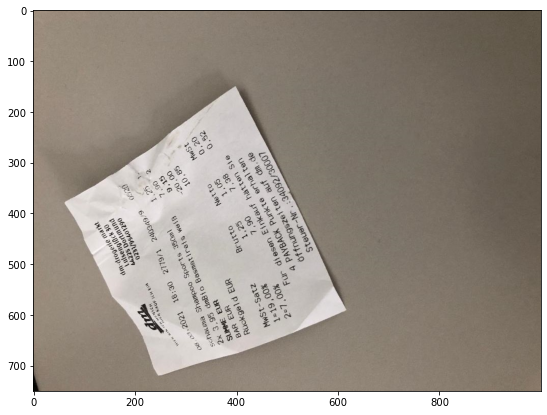

In [84]:
img = r'./dm.jpg'
assert os.path.exists(img), 'file does not exist'
_ = show_image(img)

# Parsing the original image as is

In [85]:
res = perform_query(BASE_URL_PARSER, 'parse', 'POST', headers=auth_header, 
                    data={'image': get_image_content(img), 'try_auto_edit': False})
try:
    res['data'].pop('raw_text')
except:
    pass
pprint(res)

{'data': {'amount': None,
          'amountexvat': None,
          'date': None,
          'hash': 'c47e3bd860c70ec6',
          'merchant_name': 'DM',
          'rotation': -67},
 'image': None}


**No wonder it didn't work**
# Detecting edges

In [86]:
res_edges = perform_query(BASE_URL_PARSER, 'detect_edges', 'GET', headers=auth_header, 
                    data={'image': get_image_content(img)})
res_edges

{'data': [[61, 381], [399, 150], [615, 591], [244, 718]]}

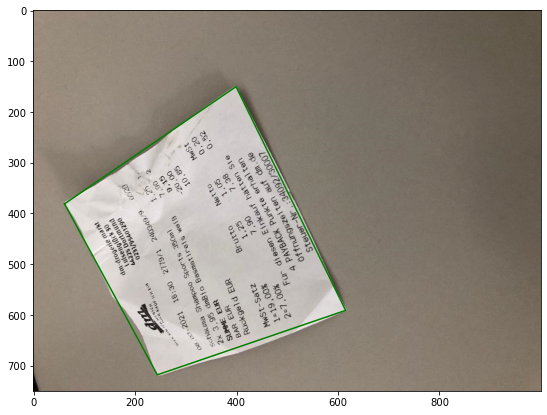

In [87]:
ax = show_image(img)
show_edges(ax, res_edges['data'])

# Bird view of the image

In [88]:
res_bird_view = perform_query(BASE_URL_PARSER, 'bird_view', 'POST', headers=auth_header, 
                    data={'image': get_image_content(img), 'points': res_edges['data']})

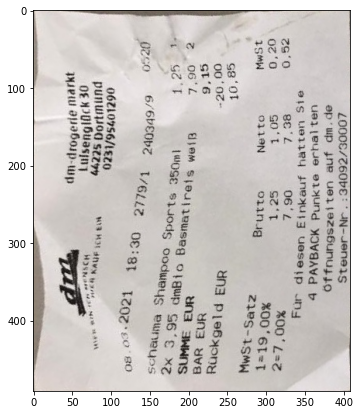

In [89]:
image_bytes = base64.b64decode(res_bird_view['data'])
_ = show_image(io.BytesIO(image_bytes))

# Parse of edited image

In [90]:
res2 = perform_query(BASE_URL_PARSER, 'parse', 'POST', headers=auth_header, 
                     data={'image': res_bird_view['data'], 'try_auto_edit': True})
try:
    res2['data'].pop('raw_text')
except KeyError:
    pass
pprint(res2)

{'data': {'amount': 915,
          'amountexvat': 843,
          'date': '2021-03-08T00:00:00',
          'hash': 'f7dea000f0311f7c',
          'merchant_name': 'DM',
          'rotation': 86},
 'image': None}


# One can do all in one call

{'data': {'amount': 915,
          'amountexvat': 843,
          'date': '2021-03-08T00:00:00',
          'hash': 'c47e3bd860c70ec6',
          'merchant_name': 'DM',
          'rotation': -67}}


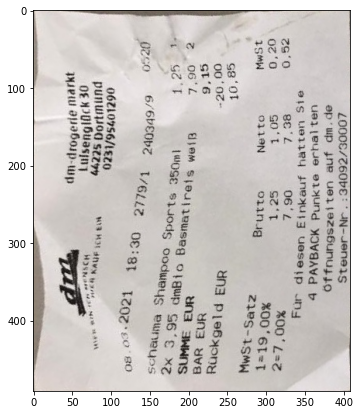

In [91]:
res3 = perform_query(BASE_URL_PARSER, 'parse', 'POST', headers=auth_header, 
                    data={'image': get_image_content(img), 
                          'edit_image': True,
                          'try_auto_edit': True})
res3['data'].pop('raw_text')
image = res3.pop('image')
pprint(res3)

image_bytes = base64.b64decode(image)
_ = show_image(io.BytesIO(image_bytes))